# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 68
2. Student Names - Anmol Agrawal (aa96674)
                   Aishwarya Parida (ap63595)

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. **(2 points)** Write down the class-conditional data distributions for each of the classes defined above.

b. **(4 points)**. Derive the Bayes optimal decision boundaries for this problem.

c. **(4 points)** What is the Bayes Error rate for this classifier?

>Solution to this question is submitted as a separate pdf file named Q1.

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [1]:
!pip install torch torchvision

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import torch.optim
from sklearn.metrics import confusion_matrix

a. **(5 points)** Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [20]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = torchvision.datasets.SVHN(root='./data', 
                                          split='train',  
                                          transform=transform, 
                                          download=True)

test_dataset = torchvision.datasets.SVHN(root='./data', 
                                         split='test', 
                                         transform=transform, 
                                         download=True)

### END CODE ###

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


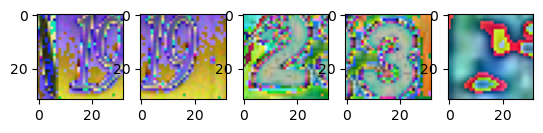

In [21]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. **(5 points)** Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [22]:
from torch.utils.data import DataLoader, random_split

train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = random_split(train_dataset, [train_num, val_num])
### END CODE ###


# Create data loaders
### START CODE ###
train_dataloader = DataLoader(train_dataset, batch_size= 256, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size= 256, shuffle=False, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size= 256, shuffle=False, num_workers=2)

### END CODE ###

c. **(5 points)** Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [23]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
        )
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ### 
        x = self.flatten(x)
        x = self.linear_relu_stack(x)  
        ### END CODE ###
        return x

In [24]:
model = MLP()
# Create the optimizer
### START CODE ###
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END CODE ###


d. **(5 points)** Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [25]:
loss_fn = nn.CrossEntropyLoss()
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = loss_fn(out, target)
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = loss_fn(out, target)
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [26]:
#Please note, we kept epochs at 15 because its hard coded and not included in ## START CODE, ## END CODE statements
epochs = 15
for e in range(1, epochs + 1):
    train_loss = train(model, train_dataloader, optimizer)
    val_loss, val_acc = eval(model, val_dataloader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.01it/s]


Epoch: 1 Train Loss: 1.490334559721646 Val Loss: 1.0640280456644506 Val Acc: 0.6748566748566749


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.01it/s]


Epoch: 2 Train Loss: 0.9783712765999839 Val Loss: 0.9073017925601692 Val Acc: 0.7291837291837292


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.02it/s]


Epoch: 3 Train Loss: 0.8568997477327697 Val Loss: 0.8435469929097358 Val Acc: 0.7486349986349986


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.01it/s]


Epoch: 4 Train Loss: 0.7873958055918742 Val Loss: 0.8581073324666659 Val Acc: 0.7444717444717445


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.03it/s]


Epoch: 5 Train Loss: 0.7377571083480065 Val Loss: 0.7748506837388449 Val Acc: 0.7745017745017745


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  3.95it/s]


Epoch: 6 Train Loss: 0.702171996445107 Val Loss: 0.7671592363463768 Val Acc: 0.7771635271635272


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.00it/s]


Epoch: 7 Train Loss: 0.6745721729895471 Val Loss: 0.7344967078843665 Val Acc: 0.7874010374010374


100%|███████████████████████████████████████████| 58/58 [00:15<00:00,  3.83it/s]


Epoch: 8 Train Loss: 0.6474489802244672 Val Loss: 0.7122870068097095 Val Acc: 0.7911547911547911


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  3.90it/s]


Epoch: 9 Train Loss: 0.6255356866307922 Val Loss: 0.7006655951162001 Val Acc: 0.7968877968877969


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.00it/s]


Epoch: 10 Train Loss: 0.6027104084274689 Val Loss: 0.6906535307826678 Val Acc: 0.7993447993447993


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  3.88it/s]


Epoch: 11 Train Loss: 0.5919401671097004 Val Loss: 0.6879570663642467 Val Acc: 0.802006552006552


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  3.98it/s]


Epoch: 12 Train Loss: 0.5830042872816596 Val Loss: 0.6905434317124075 Val Acc: 0.7974337974337974


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.06it/s]


Epoch: 13 Train Loss: 0.5652734364546684 Val Loss: 0.6779034275224942 Val Acc: 0.8035080535080535


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.00it/s]


Epoch: 14 Train Loss: 0.5541151391565876 Val Loss: 0.6779007090918197 Val Acc: 0.8076030576030576


100%|███████████████████████████████████████████| 58/58 [00:14<00:00,  4.04it/s]

Epoch: 15 Train Loss: 0.5527208017383498 Val Loss: 0.6824803978668481 Val Acc: 0.8067158067158067


e. **(5 points)** Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

100%|█████████████████████████████████████████| 102/102 [00:13<00:00,  7.45it/s]


Test accuracy: 0.7786186232329441


<Axes: >

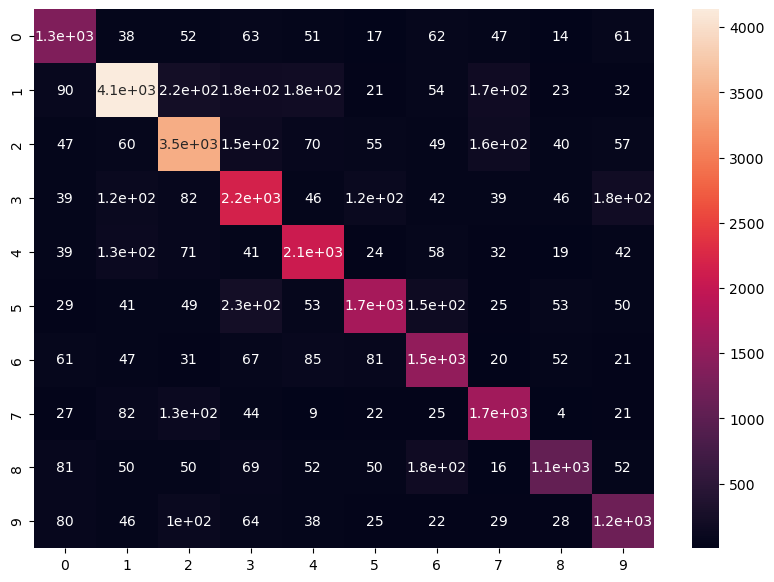

In [27]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_dataloader):
        out = model(data)
        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        all_y_true.extend(target.tolist())
        all_y_pred.extend(pred.tolist())
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
cm = confusion_matrix(all_y_true, all_y_pred)

### END CODE ###


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Q4. (10 points) Bayesian Belief Networks

a) **(3 points)** Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

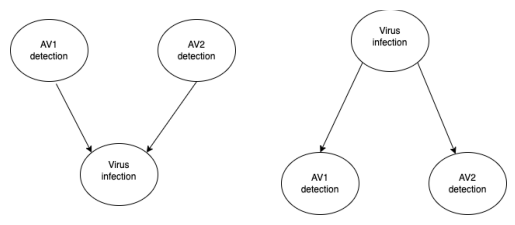

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline
img_A = mpimg.imread('hwq.drawio (3).png')
img_B = mpimg.imread('hwq.drawio (4).png')

fig, ax = plt.subplots(1,2)
fig.patch.set_visible(False)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

##### Solution
The two Bayesian belief networks (BBNs) in the image are:

BBN A:

AV1 detection -> Virus infection -> AV2 detection

BBN B:

AV1 detection <-> Virus infection <-> AV2 detection

>The first BBN (on the left/ BBN A) captures the independence assumptions correctly. In this BBN, both anti-virus detections are dependent on the presence of a virus infection but are independent of each other given the "Virus infection". The second BBN (BBN B), on the other hand, suggests a dependence between the two antivirus detections for determining a virus infection.

Therefore, BBN A is the correct answer.



b) **(7 points)** From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1\
P(AV2 detection = T) = 0.2

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 \
P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 \
P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 \
P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 

##### Solution
**Bayes' Theorem**

Given the following information:

P(AV1 detection = T) = 0.1\
P(AV2 detection = T) = 0.2\
P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8

Using Bayes' theorem and the definition of conditional probability, we can calculate this probability as follows:

P(AV2 detection | AV1 detection, virus infection) = P(virus infection | AV1 detection, AV2 detection) * P(AV2 detection) / P(virus infection | AV1 detection)

To calculate P(virus infection | AV1 detection), we can use the following formula:

P(virus infection | AV1 detection) = P(virus infection | AV1 detection, AV2 detection) * P(AV2 detection) + P(virus infection | AV1 detection, no AV2 detection) * P(no AV2 detection)

Plugging in the given probabilities, we get:

P(virus infection | AV1 detection) = 0.8 * 0.2 + 0.7 * 0.8 = 0.72

Now, we can plug this value into the main formula to calculate the probability of AV2 detection given AV1 detection and virus infection:

P(AV2 detection | AV1 detection, virus infection) = 0.8 * 0.2 / 0.72 = 0.2222

Therefore, the probability of AV2 detection given AV1 detection and virus infection is 0.2222, or approximately 22.22%.



## Q5. (25 points) Classification using Sklearn and Model Evaluation

The objective of this question is to introduce you to Scikit-Learn and its various tools for creating and assessing classification models. You will work with the Customer_Churn_Telecom dataset. First, you'll need to perform some data preprocessing tasks on this dataset. After that, your task is to utilize Scikit-Learn to construct a range of classifiers using this dataset, followed by evaluating the performance of these models. To gain a better understanding of the specific steps involved, please proceed to read the subsequent sections of the question for further instructions.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving customer_churn_telcom.csv to customer_churn_telcom.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [2]:
#lets print the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing and Splitting

In [17]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'

## CODE HERE ##

df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

print_unique_col_values(df)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [18]:
# Changing values to 0/1

## CODE HERE ##
# Convert 'Yes' to 1 and 'No' to 0
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##

# (a) Convert all 'Yes' values to 1 and 'No' values to 0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# (b) Convert all 'Female' values to 1 and 'Male' values to 0
df.replace({'Female': 1, 'Male': 0}, inplace=True)

# Check changes for the specified columns
for col in yes_no_columns:
    print(f'{col}: {df[col].unique()}')

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [19]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##
df2 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [20]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [21]:
# Train test split
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis=1)
y = df2['Churn']

# Write code to make train and test splits
## START CODE ##
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
## END CODE ##

In [22]:
# Write code to make train and validation splits

## START CODE ##
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=15, stratify=y_train_full)
## END CODE ##

In [23]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

In [24]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## CODE HERE ##

# Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions using Decision Tree
dt_val_predictions = dt_classifier.predict(X_val)
dt_test_predictions = dt_classifier.predict(X_test)

# Confusion matrices for Decision Tree
dt_val_confusion = confusion_matrix(y_val, dt_val_predictions)
dt_test_confusion = confusion_matrix(y_test, dt_test_predictions)
print("Decision Tree Validation Confusion Matrix:\n", dt_val_confusion)
print("Decision Tree Test Confusion Matrix:\n", dt_test_confusion)


Decision Tree Validation Confusion Matrix:
 [[659 167]
 [158 141]]
Decision Tree Test Confusion Matrix:
 [[838 195]
 [197 177]]


In [25]:
from sklearn.metrics import classification_report
print("\nFor Validation Set: \n", classification_report(y_val, dt_val_predictions))
print("\nFor Test Set: \n", classification_report(y_test, dt_test_predictions))


For Validation Set: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       826
           1       0.46      0.47      0.46       299

    accuracy                           0.71      1125
   macro avg       0.63      0.63      0.63      1125
weighted avg       0.71      0.71      0.71      1125


For Test Set: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.48      0.47      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Predictions using Logistic Regression
lr_val_predictions = lr_classifier.predict(X_val)
lr_test_predictions = lr_classifier.predict(X_test)

# Confusion matrices for Logistic Regression
lr_val_confusion = confusion_matrix(y_val, lr_val_predictions)
lr_test_confusion = confusion_matrix(y_test, lr_test_predictions)
print("\nLogistic Regression Validation Confusion Matrix:\n", lr_val_confusion)
print("Logistic Regression Test Confusion Matrix:\n", lr_test_confusion)


Logistic Regression Validation Confusion Matrix:
 [[734  92]
 [143 156]]
Logistic Regression Test Confusion Matrix:
 [[929 104]
 [170 204]]


In [27]:
print("\nFor Validation Set: \n", classification_report(y_val, lr_val_predictions))
print("\nFor Test Set: \n", classification_report(y_test, lr_test_predictions))


For Validation Set: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       826
           1       0.63      0.52      0.57       299

    accuracy                           0.79      1125
   macro avg       0.73      0.71      0.72      1125
weighted avg       0.78      0.79      0.78      1125


For Test Set: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [28]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

## CODE HERE ##
# MLP Classifier
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(X_train, y_train)

# Predictions using MLP
mlp_val_predictions = mlp_classifier.predict(X_val)
mlp_test_predictions = mlp_classifier.predict(X_test)

# Confusion matrices for MLP
mlp_val_confusion = confusion_matrix(y_val, mlp_val_predictions)
mlp_test_confusion = confusion_matrix(y_test, mlp_test_predictions)
print("\nMLP Classifier Validation Confusion Matrix:\n", mlp_val_confusion)
print("MLP Classifier Test Confusion Matrix:\n", mlp_test_confusion)


MLP Classifier Validation Confusion Matrix:
 [[699 127]
 [141 158]]
MLP Classifier Test Confusion Matrix:
 [[871 162]
 [190 184]]


In [30]:
print("\nFor Validation Set: \n", classification_report(y_val, mlp_val_predictions))
print("\nFor Test Set: \n", classification_report(y_test, mlp_test_predictions))


For Validation Set: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       826
           1       0.55      0.53      0.54       299

    accuracy                           0.76      1125
   macro avg       0.69      0.69      0.69      1125
weighted avg       0.76      0.76      0.76      1125


For Test Set: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1033
           1       0.53      0.49      0.51       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.74      0.75      0.75      1407



(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

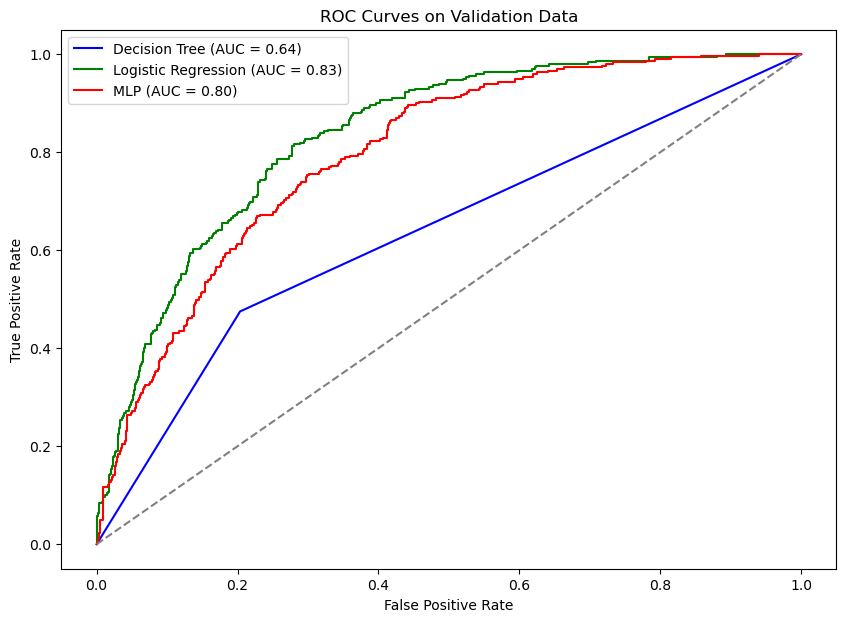

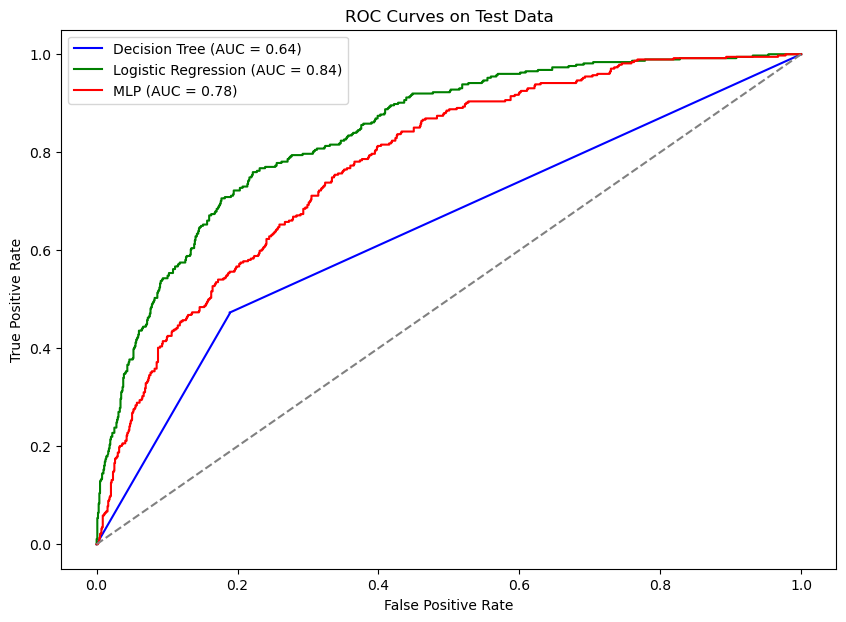

In [31]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for validation and test data
dt_val_probs = dt_classifier.predict_proba(X_val)[:, 1]
lr_val_probs = lr_classifier.predict_proba(X_val)[:, 1]
mlp_val_probs = mlp_classifier.predict_proba(X_val)[:, 1]

dt_test_probs = dt_classifier.predict_proba(X_test)[:, 1]
lr_test_probs = lr_classifier.predict_proba(X_test)[:, 1]
mlp_test_probs = mlp_classifier.predict_proba(X_test)[:, 1]

# Helper function to plot ROC curves using RocCurveDisplay
def plot_roc_curves_with_display(probs_list, y_true, title):
    plt.figure(figsize=(10, 7))
    colors = ['b', 'g', 'r']
    models = ['Decision Tree', 'Logistic Regression', 'MLP']

    for i, (probs, model) in enumerate(zip(probs_list, models)):
        fpr, tpr, _ = roc_curve(y_true, probs)
        auc = roc_auc_score(y_true, probs)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=model)
        display.plot(ax=plt.gca(), color=colors[i], label=f'{model} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot ROC curves for validation and test data
plot_roc_curves_with_display([dt_val_probs, lr_val_probs, mlp_val_probs], y_val, 'ROC Curves on Validation Data')
plot_roc_curves_with_display([dt_test_probs, lr_test_probs, mlp_test_probs], y_test, 'ROC Curves on Test Data')


(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

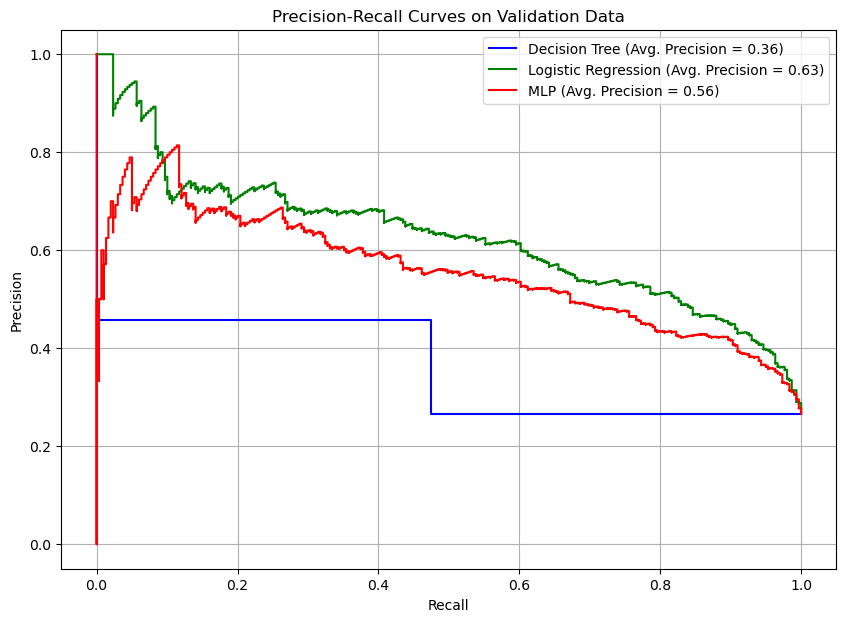

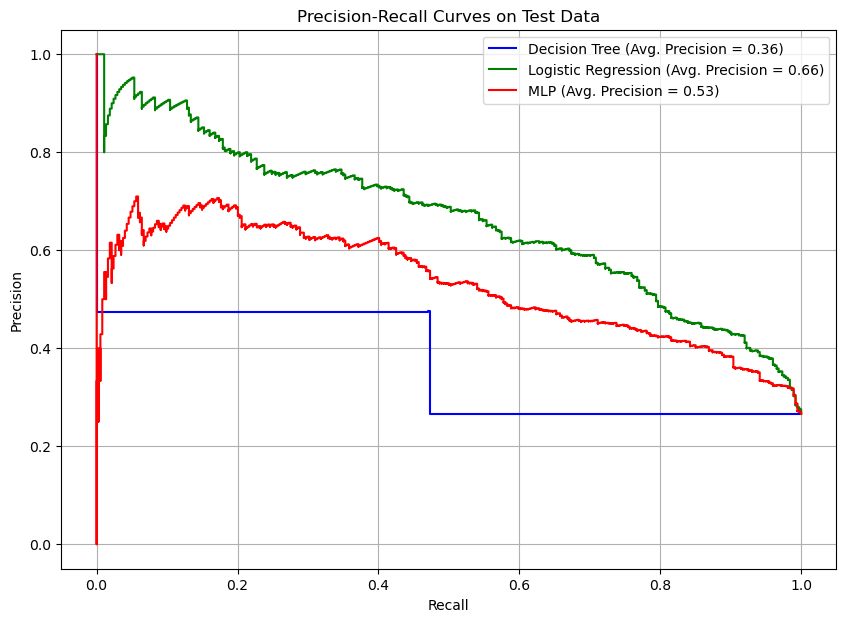

In [32]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for validation and test data
dt_val_probs = dt_classifier.predict_proba(X_val)[:, 1]
lr_val_probs = lr_classifier.predict_proba(X_val)[:, 1]
mlp_val_probs = mlp_classifier.predict_proba(X_val)[:, 1]

dt_test_probs = dt_classifier.predict_proba(X_test)[:, 1]
lr_test_probs = lr_classifier.predict_proba(X_test)[:, 1]
mlp_test_probs = mlp_classifier.predict_proba(X_test)[:, 1]

# Helper function to plot Precision-Recall curves using PrecisionRecallDisplay
def plot_pr_curves_with_display(probs_list, y_true, title):
    plt.figure(figsize=(10, 7))
    colors = ['b', 'g', 'r']
    models = ['Decision Tree', 'Logistic Regression', 'MLP']

    for i, (probs, model) in enumerate(zip(probs_list, models)):
        precision, recall, _ = precision_recall_curve(y_true, probs)
        avg_precision = average_precision_score(y_true, probs)
        display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=avg_precision, estimator_name=model)
        display.plot(ax=plt.gca(), color=colors[i], label=f'{model} (Avg. Precision = {avg_precision:.2f})')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Precision-Recall curves for validation and test data
plot_pr_curves_with_display([dt_val_probs, lr_val_probs, mlp_val_probs], y_val, 'Precision-Recall Curves on Validation Data')
plot_pr_curves_with_display([dt_test_probs, lr_test_probs, mlp_test_probs], y_test, 'Precision-Recall Curves on Test Data')
